## Grid histogram

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tifffile

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import aicsUtil2 # does not require bimpy
import aicsGridNapari # to display the grid in napari

In [2]:
dataPath = '/Users/cudmore/data'
dateStr = '20200717'
gridShape = (11,4)
aicsGridParam = aicsUtil2.mySetDefaultGridParams(dataPath, dateStr, gridShape)

In [7]:
# open a napri viewer
aicsGridNapari.aicsGridNapari(aicsGridParam)


aicsGridNapari()
   masterFilePath : aicsBatch/20200717_cell_db.csv
   path : /Users/cudmore/data/20200717
   prefixStr : 20200717__A01_G001_
   commonShape : (88, 740, 740)
   commonVoxelSize : (1, 0.3977476346942534, 0.3977476346942534)
   channelList : [1, 2]
   gridShape : (11, 4)
   finalPostfixList : ['', '_mask', '_labeled']
   trimPercent : 15
   doUseInclude : False
   doUseFirstLast : False
   snakeGrid : [[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]
 [25 26 27 28]
 [32 31 30 29]
 [33 34 35 36]
 [40 39 38 37]
 [41 42 43 44]]
   bigStackShape : (88, 8140, 2960)
   doCountLabels : False
building 6 blocks. Each block is a grid of images
  1 of 6 calling myGetBlock() channel 1, finalPostfixStr ""
    making bigStack shape: (88, 8140, 2960) type: <class 'numpy.uint8'>
  2 of 6 calling myGetBlock() channel 1, finalPostfixStr "_mask"
    aicsGridNapari() did not find files for block, channel: 1 finalPostfixStr: _mask
  3 of 6 calling myGet

## One Histogram

In [59]:
def plotOneHist(stackData, sliceNum, fig, ax):
    print('plotOneHist()', sliceNum)
    if sliceNum is not None:
        oneSlice = stackData[sliceNum,:,:]
    else:
        oneSlice = stackData
    flatData = np.ravel(oneSlice)
    
    numBins = 255
    
    ax.cla()
    
    # need histtype='step' to make it fast
    n, bins, patches = ax.hist(flatData, numBins, density=False, histtype='step', facecolor='g', alpha=0.75)

    ax.set_yscale('log')
    
    #plt.draw()
    fig.canvas.draw()
    fig.canvas.flush_events()


plotOneHist() None


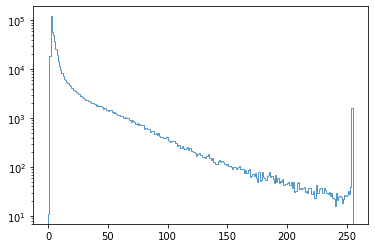

In [60]:
# one hist
stackPath = '/Users/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0018_ch1.tif'
stackData = tifffile.imread(stackPath)

fig, ax = plt.subplots(nrows=1, ncols=1)

i = 0
oneSlice = stackData[i,:,:]
plotOneHist(oneSlice, None, fig, ax)

IntSlider(value=10, max=87)

Output(layout=Layout(height='300px'))

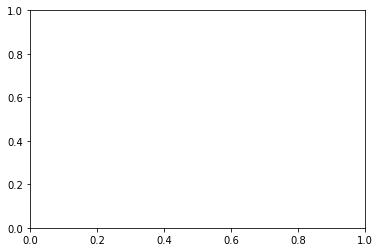

2 plotOneHist2() 53
2 plotOneHist2() 69
2 plotOneHist2() 76
2 plotOneHist2() 26
2 plotOneHist2() 8
2 plotOneHist2() 55
2 plotOneHist2() 46
2 plotOneHist2() 37
2 plotOneHist2() 28


In [5]:
stackPath = '/Users/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0018_ch1.tif'
stackData = tifffile.imread(stackPath)

fig, ax = plt.subplots(nrows=1, ncols=1)

def plotOneHist2(sliceNum):
    oneSlice = stackData[sliceNum,:,:]
    flatData = np.ravel(oneSlice)
    
    numBins = 255
    
    with out:
        counts, bins, bars = plt.hist(flatData, numBins, density=False, histtype='step', facecolor='g', alpha=0.75);
        plt.yscale('log')
        plt.title(str(sliceNum))
        out.clear_output()
        plt.show()
        
    print('2 plotOneHist2()', sliceNum)
    
def plotOneHist3(change):
    plotOneHist2(change['new']);   

out = widgets.Output(layout = widgets.Layout(height='300px'))

numSlices = stackData.shape[0]-1
myIntSlider = widgets.IntSlider(min=0, max=numSlices, step=1, value=10)

myIntSlider.observe(plotOneHist3, names='value');

display(myIntSlider)
display(out)



## Grid of histogram

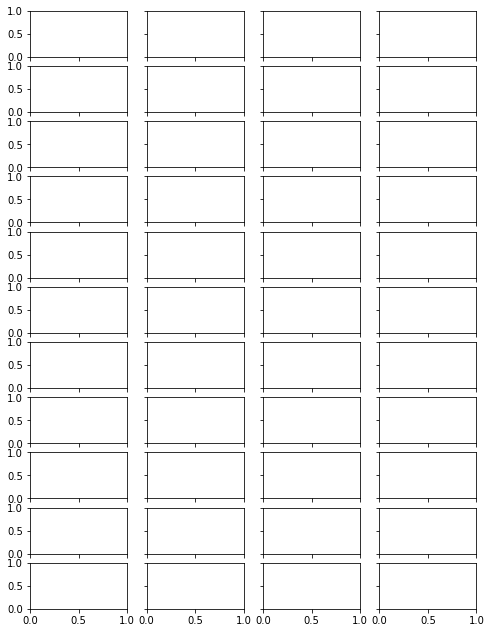

In [6]:
# grid of hist

nRow = aicsGridParam['gridShape'][0]
nCol = aicsGridParam['gridShape'][1]
figWidth = nCol * 2
figHeight = nRow
fig, axs = plt.subplots(nrows=nRow, ncols=nCol,
                            sharex=True, sharey=True, figsize=(figWidth,figHeight), constrained_layout=False)
axs = np.ravel(axs)


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


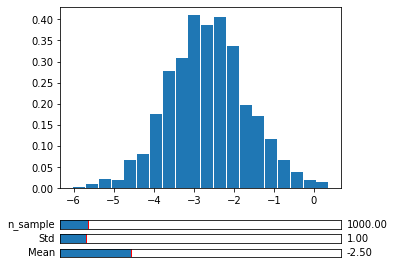